In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("sneaker_sales\Adidas Yeezy Boost 350 V2 Zebra.csv")
df.head()

,Unnamed: 0,createdAt,amount,shoeSize
0,0,2017-10-30 23:21:47,636,10.5
1,1,2017-10-30 23:21:03,630,10.5
2,2,2017-10-30 23:18:54,626,10.0
3,3,2017-10-30 23:18:21,580,9.0
4,4,2017-10-30 23:15:09,580,11.5


In [4]:
df['createdAt'] = df['createdAt'].astype('datetime64[ns]')
df.head()

,Unnamed: 0,createdAt,amount,shoeSize
0,0,2017-10-30 23:21:47,636,10.5
1,1,2017-10-30 23:21:03,630,10.5
2,2,2017-10-30 23:18:54,626,10.0
3,3,2017-10-30 23:18:21,580,9.0
4,4,2017-10-30 23:15:09,580,11.5


In [5]:
# df.sort_values(by='Unnamed: 0', ascending=True)
df.sort_values(by='createdAt', ascending=False)
df['obs'] = [x for x in range(len(df), 0,-1)]
df.sort_values(by='obs', ascending=True, inplace=True)
df.head()

,Unnamed: 0,createdAt,amount,shoeSize,obs
27367,27367,2017-02-18 19:35:06,1200,10.0,1
27366,27366,2017-02-20 03:25:56,1400,10.5,2
27365,27365,2017-02-23 21:18:31,1300,7.0,3
27364,27364,2017-02-20 23:08:18,1200,11.5,4
27363,27363,2017-02-24 15:07:19,1450,11.0,5


(300, 3500)

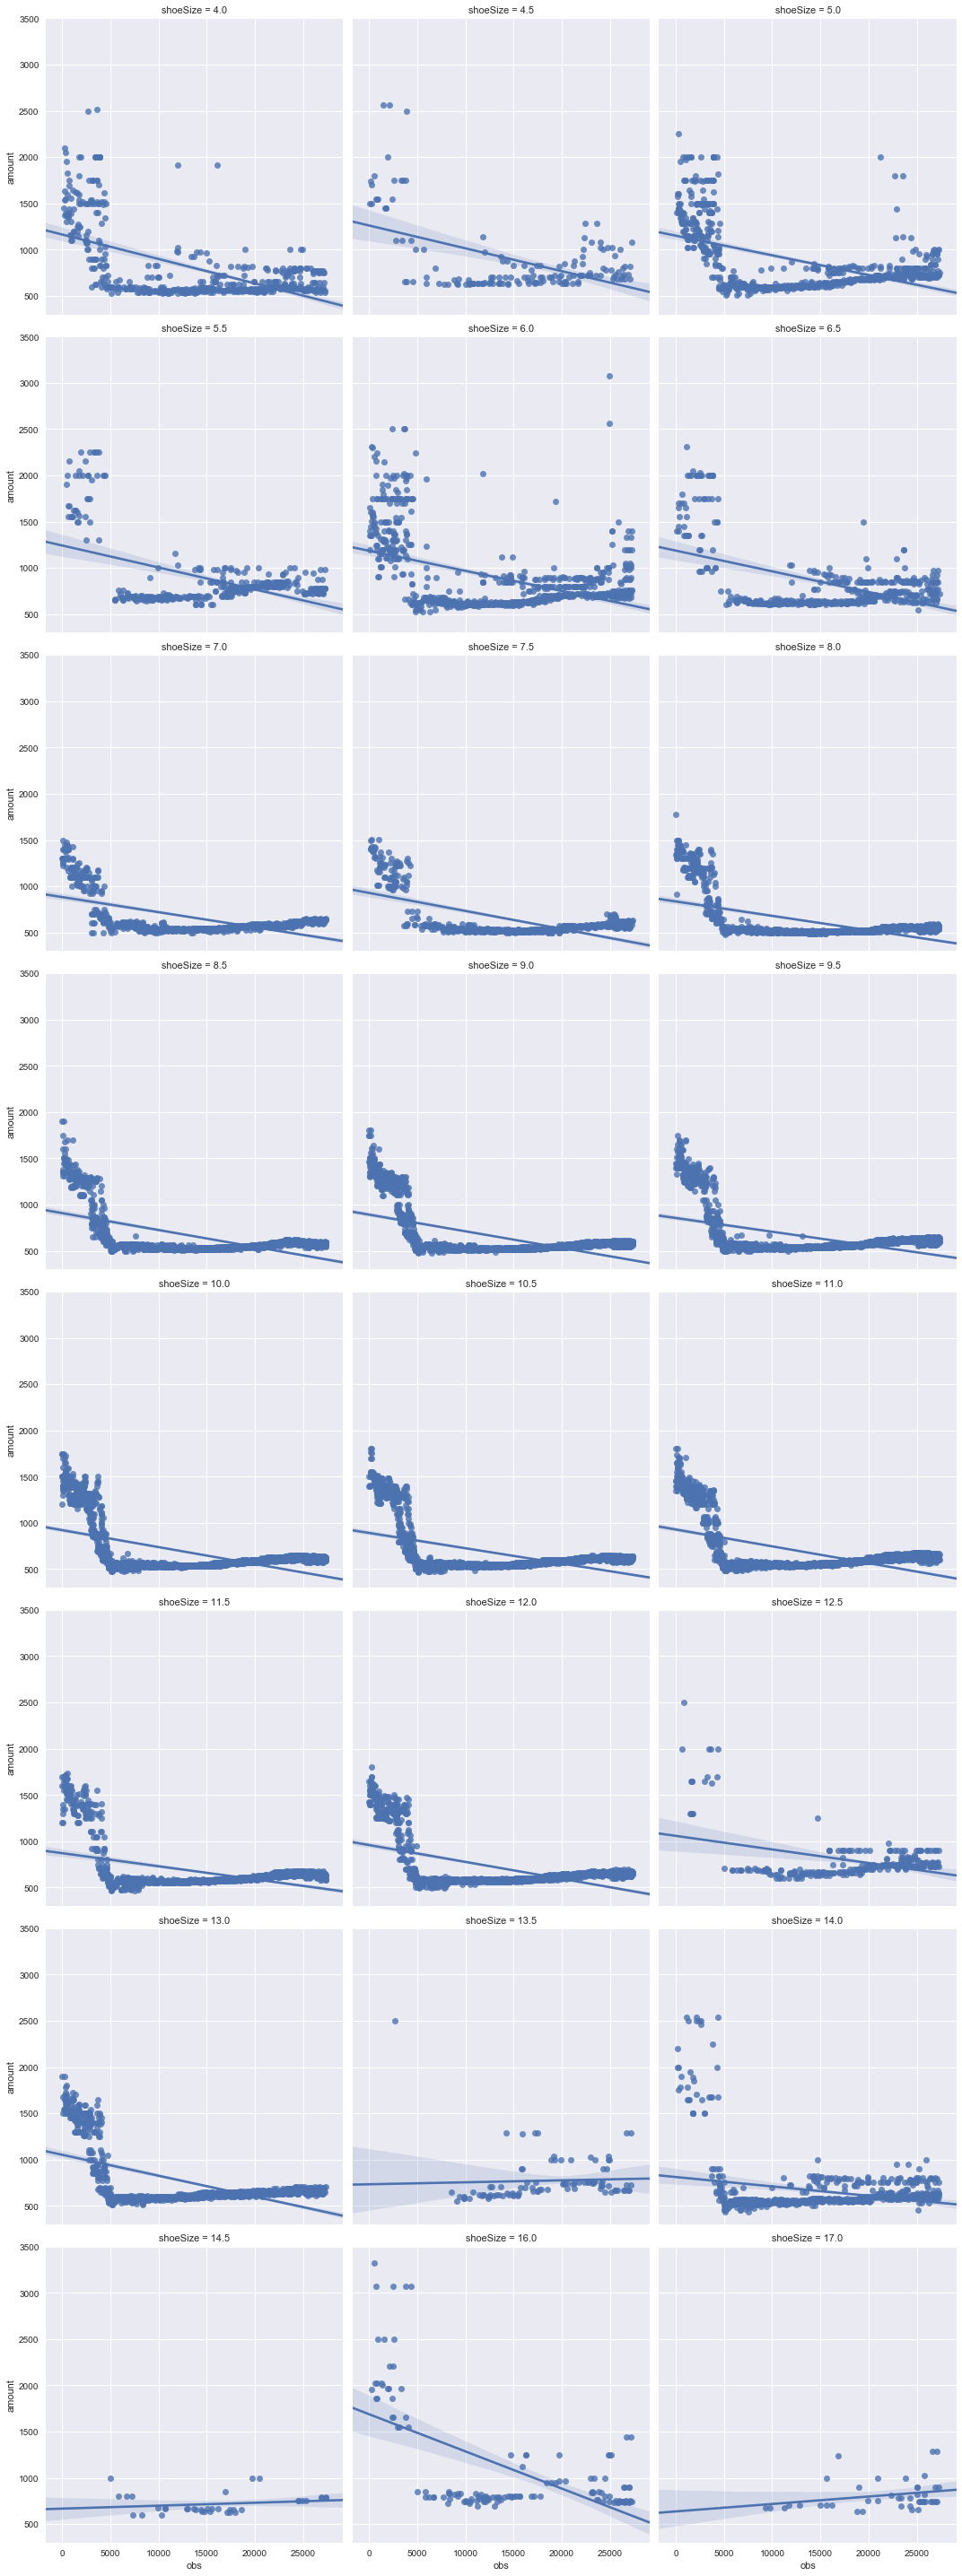

In [6]:
df2 = df[['createdAt', 'amount']]
# plt.rcParams['figure.figsize']=(20,10)
lm = sns.lmplot(data=df, x='obs', y='amount', col='shoeSize', col_wrap=3)
axes = lm.axes
axes[0,].set_ylim(300,3500)

# plt.plot(df['createdAt'], df['amount'])
# plt.figure(figsize=(5,9), dpi=100)
# plt.show()

C:\Users\ok\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


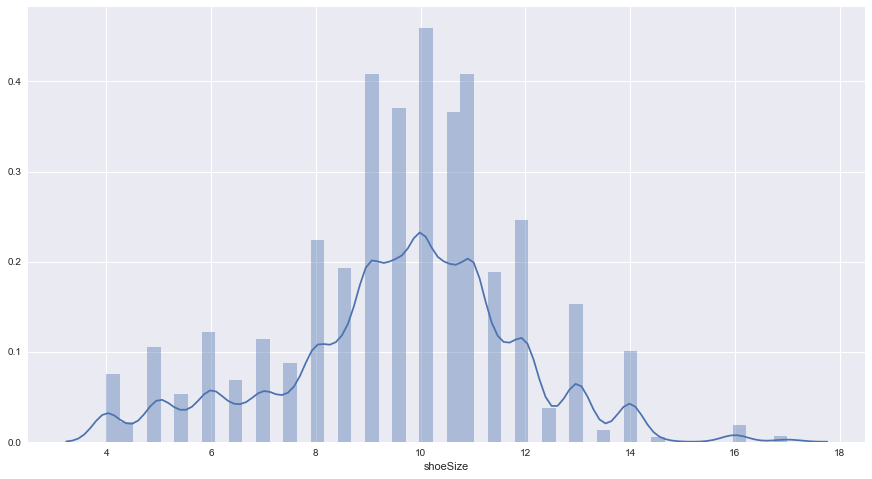

In [7]:
sns.set_context(context='notebook', rc={'figure.figsize':(15,8)})
sns.distplot(df['shoeSize'])

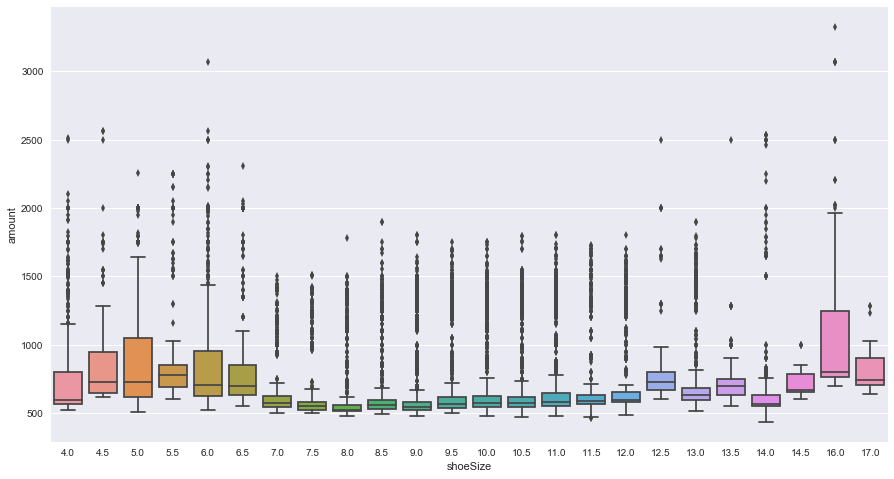

In [8]:
sns.boxplot(data=df, x='shoeSize', y='amount')

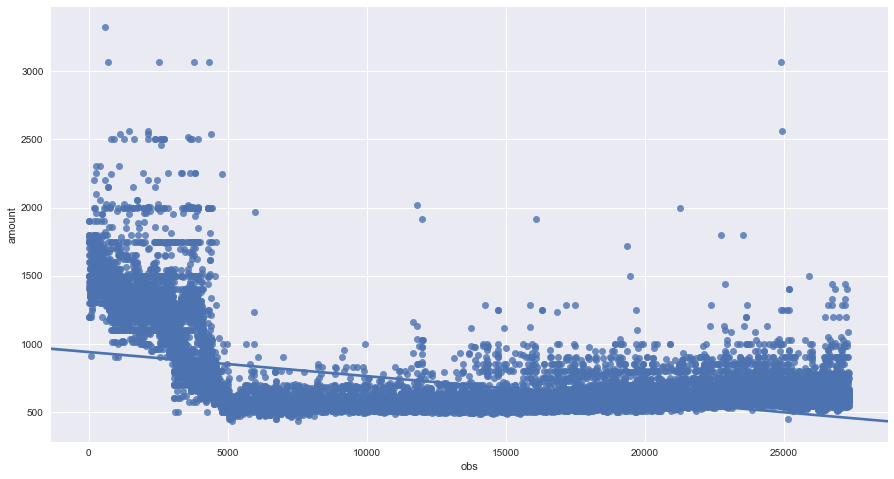

In [9]:
g = sns.regplot(x="obs", y="amount", data = df)



In [10]:
df[["amount"]].describe()

,amount
count,27368.000000
mean,697.187628
std,286.512953
min,435.000000
25%,545.000000
50%,582.000000
75%,656.000000
max,3327.000000
